# Projeto 1 - Ciência dos Dados

Nome: _Tales Ivalque_

Nome: _Andrei Melo_

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [4]:
#Rode se não tiver a biblioteca instalada :
#!pip install unidecode
#!pip install re
#!pip install seaborn
#!pip install nltk

In [5]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import unidecode
import seaborn as sn
from nltk import SnowballStemmer
from nltk.corpus import stopwords


In [6]:
# para eliminar as preposições usei o link a seguir como referencia
# https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
import nltk 

In [7]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\TalesITF\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\GitHub\22-1b-cd-p1-grupo_talandrei


Carregando a base de dados com as notícias classificadas manualmente como Relevantes e Irrelevantes:

In [8]:
filename = 'dados.xlsx'

In [9]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Mercados,Vale (VALE3): Por que as ações tiveram um dos ...,As ações da Vale (VALE3) tiveram um dos piores...,08/03/2022 - 19:35,4,RELEVANTE
1,Invasão da Ucrânia,Rússia invade Ucrânia: Veja as primeiras fotos...,"O presidente Vladimir Putin autorizou, na noit...",24/02/2022 - 10:10,41,IRRELEVANTE
2,Economia,Brasil é beneficiado por empresas que convivem...,"O presidente do Banco Central, Roberto Campos ...",22/02/2022 - 16:53,47,IRRELEVANTE
3,Resultados,Bayer supera expectativa e tem lucro líquido d...,"A Bayer obteve lucro líquido de 1,16 bilhão de...",02/03/2022 - 11:23,24,RELEVANTE
4,Colunista Vitreo,Pré-Mercado: E o petróleo vai às alturas,"O mercado sofre bastante internacionalmente, a...",07/03/2022 - 8:46,11,RELEVANTE


In [10]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Internacional,Joe Biden: 20 frases marcantes de seu 1º discu...,NaN,01/03/2022 - 22:56,25,IRRELEVANTE
1,Política,Biden anuncia proibição dos EUA a importações ...,"O presidente dos Estados Unidos, Joe Biden, an...",08/03/2022 - 13:52,6,RELEVANTE
2,Internacional,China critica EUA e não condena Rússia por açã...,A China se recusou a condenar o ataque da Rúss...,24/02/2022 - 12:08,40,IRRELEVANTE
3,Mercados,S&P 500 abre em forte queda após Rússia atacar...,As bolsas dos Estados Unidos abriram em forte ...,24/02/2022 - 11:37,40,RELEVANTE
4,Carteira Recomendada,Genial faz duas alterações em carteira recomen...,A Genial Investimentos fez duas alterações em ...,28/02/2022 - 15:53,27,IRRELEVANTE


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação das notícias (Target).

Nos últimos meses, a tensão militar entre a Rússia e a Ucrânia evoluiu em uma guerra. E, como o conflito envolve uma das grandes potências mundiais, deve-se entender que a economia mundial sofrerá algumas mudanças. Assim, esse projeto visa filtrar as notícias que falam sobre essas mudanças.

Utilizando o classificador automático buscamos discernir a relevência econômica de notícias sobre a guerra, no caso, quais notícias falam sobre consequências econômicas em detrimento da guerra, indepedente de ser positiva ou negativa. Com isso, notícias que trazem fatos apenas sobre as relações políticas, estritamente militares ou que tangeciam o aspecto econômico foram consideradas irrelevantes para o classificador.

### Procedimentos Iniciais

Aqui, vamos definir algumas funções muito pertinentes para a limpeza das notícias do nosso classificador.
Cobrindo os procedimentos de:

#### 1) Lower case
        No qual todas as letras ficam minúsculas
#### 2) Pontuação
        Onde vamos limpar os sinais de pontuação
#### 3) Acentuação
        Vamos retirar os acentos das letras
#### 4) Stemming
        Aqui as palavras se reduzem ao radical para facilitar aglomeração

In [11]:
#Primeira limpeza
stemmer = SnowballStemmer('portuguese')

def clean_frase(frase):
    #Transforma tudo em minúsculo
    aux = str(frase)
    
    aux = aux.lower()
    
    #Retira toda a pontuação
    aux = re.sub('[()!?:.%&,]', ' ', aux)
    aux = re.sub('\[.*?\-]',' ', aux)
    
    aux = re.sub('123456789',' ',aux)
    #Remove acentos
    aux = unidecode.unidecode(aux)
    
    #Reduz ao radical
    aux_2 = ''
    lista_palavras = aux.split()
    for palavra in lista_palavras:
        new_p = stemmer.stem(palavra)
        aux_2 += new_p + ' '
    aux = aux_2.rstrip()
    return aux

In [12]:
#String para lista e lista para string
#'token' transforma uma frase em lista de palavras, de forma a ser possível acessar uma a uma
#'corda' transforma uma lista em uma string, função auxiliar do programa

def token(frase):
    frase = str(frase)
    return frase.split()

def corda(lista):
    return ' '.join(lista)

In [13]:
# Segunda limpeza
# Aqui contabilizaremos e vamos retirar as 'stop words' de uma lista de palavras
nltk.download('stopwords')
prep = stopwords.words('Portuguese')

def out_stopwords(token):
    clean = []
    for word in token:
        if word not in prep:
            clean.append(word)
    return clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TalesITF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Função geral de limpeza
def limpatudo(noticia):
    return corda(out_stopwords(token(clean_frase(noticia))))

In [15]:
#Função para gerar um pd.Series com as palvras de uma frase
def serie(frase):
    frase += ' '
    return pd.Series(token(frase.sum()))

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

#### Modelo Bolsa de Palavras:
Consiste na contagem da aparição de cada palavras dentro de um conjunto de textos. Faz-se isso pela formação de uma estrutura de dados que armazena cada uso de palavras para poder criar um vetor com **n** dimensões, onde **n** é o número de palavras distintas entre si, que armazena a quantidade de aparições de cada palavra no documento.

In [16]:
#Separa as notícias relevante e irrelevantes para o treinamento
treino_rel = train[train['Target']=='RELEVANTE']
treino_irrel = train[train['Target']=='IRRELEVANTE']

In [17]:
#Cria novas variáveis com as notícias limpas
treino_rel_clean = treino_rel.Titulo.apply(limpatudo)
treino_irrel_clean = treino_irrel.Titulo.apply(limpatudo)

In [18]:
#Transforma as variáveis em listas
palavras_rel = serie(treino_rel_clean)
palavras_irrel = serie(treino_irrel_clean)

In [19]:
# Adquire uma lista que contém todas as palvaras sem repeti-las
list_rel = list(palavras_rel)
list_irrel = list(palavras_irrel)
list_total = list_rel + list_irrel

list_sem_repeticao = set(list_total)

In [20]:
# Conseguindo a contagem da frequência absoluta de cada palavra separado por relevância e total a partir do pd.value_counts
freq_abs_rel = palavras_rel.value_counts()
freq_abs_irrel = palavras_irrel.value_counts()
freq_abs_total = pd.Series(list_total).value_counts()

## Probabilidades

In [21]:
#Probabilidade de uma frase qualquer ser relevante(P_R) ou irrelevante(P_Ir)
#P_R + P_Ir = P_R + P_Rc = 1

P_R = len(list_rel)/len(list_total)
P_Ir = len(list_irrel)/len(list_total)

#### Probabilidades condicionais

O Teorema de Bayes estipula o uso de probabilidades independentes para o cálculo de probabilidades condicionais, isto é a probabilidade de um evento acontecer dado que outro tenha acontecido.
Para isso, utiliza-se as relações:

-$\quad P(Rel|frase) = \frac{P(frase|Rel)P(Rel)}{P(frase)}$ 

-$\quad P(Irrel|frase) = \frac{P(frase|Irrel)P(Irrel)}{P(frase)}$

Legenda:
    
-$\quad P(frase|Rel)$ = Probabilidade de uma frase dada qualquer ser relevante
    
-$\quad P(frase|Irrel)$ = Probabilidade de uma frase dada qualquer ser irrelevante
    
-$\quad P(Rel)$ = Probabilidade de uma frase ser relevante na base de dados
    
-$\quad P(Irrel)$ = Probabilidade de uma frase ser irrelevante na base de dados

-$\quad P(frase) = P(Rel) + P(Irrel) $

#### Suavização de LaPlace

In [22]:
# Criando a função de Laplace para os casos relevantes e irrelevantes. O smoothing foi usado apenas quando necessário devido
# a precisão da máquina.

def LaPlace_rel(word):
    
    if word not in list_rel:
        #Suavização de LaPlace
        k = 1/(len(list_rel)+len(list_sem_repeticao))
    
    else:
        #Cálculo normal de probabilidade
        k = freq_abs_rel[word]/freq_abs_rel.sum()
    
    return k

def LaPlace_irrel(word):
    
    if word not in list_irrel:
        #Suavização de LaPlace
        prob = 1/(len(list_irrel)+len(list_sem_repeticao))
    
    else:
        #Cálculo normal de probabilidade
        prob = freq_abs_irrel[word]/freq_abs_irrel.sum()
    
    return prob

### Naive Bayes:

In [23]:
# Cálculo da probabilidade da frase ser relevante P(frase|Rel):
def prob_rel(frase):
    aux = limpatudo(frase)
    p = 1
    for word in aux:
        p*= LaPlace_rel(word)
    return p

# Cálculo da probabilidade da frase ser irrelevante P(frase|Irrel):
def prob_irrel(frase):
    aux = limpatudo(frase)
    p = 1
    for word in aux:
        p*= LaPlace_irrel(word)
    return p

# Determinação da categoria da frase pelo Algoritmo de Bayes:
def Bayes(frase):
    
    #P(frase|Irrel) e P(frase|Rel): 
    pfrase_dadoRel = prob_rel(frase)
    pfrase_dadoIrrel = prob_irrel(frase)
    
    #P(Irrel|frase) e P(Rel|frase):
    P_rel_dado_frase = pfrase_dadoRel*P_R
    P_irrel_dado_frase = pfrase_dadoIrrel*P_Ir
    
    #Classificação baseado nas probabilidades calculadas pelo algoritmo
    if P_rel_dado_frase > P_irrel_dado_frase:
        return 'RELEVANTE'
    
    return "IRRELEVANTE"

### Testando a performace a partir da própria Base de Dados

In [24]:
performer = train.copy()

In [25]:
performer['CLEAN'] = performer['Titulo'].apply(limpatudo)
performer['Comp'] = performer.CLEAN.apply(Bayes)

performer.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target,CLEAN,Comp
0,Mercados,Vale (VALE3): Por que as ações tiveram um dos ...,As ações da Vale (VALE3) tiveram um dos piores...,08/03/2022 - 19:35,4,RELEVANTE,val vale3 aco tiv pior desempenh ibovesp nest ...,RELEVANTE
1,Invasão da Ucrânia,Rússia invade Ucrânia: Veja as primeiras fotos...,"O presidente Vladimir Putin autorizou, na noit...",24/02/2022 - 10:10,41,IRRELEVANTE,russ invad ucran vej primeir fot vid invasa,RELEVANTE
2,Economia,Brasil é beneficiado por empresas que convivem...,"O presidente do Banco Central, Roberto Campos ...",22/02/2022 - 16:53,47,IRRELEVANTE,brasil benefic empres conviv bem inflaca diz c...,IRRELEVANTE
3,Resultados,Bayer supera expectativa e tem lucro líquido d...,"A Bayer obteve lucro líquido de 1,16 bilhão de...",02/03/2022 - 11:23,24,RELEVANTE,bay sup expect lucr liqu 1 16 bilha eur 4o tri,RELEVANTE
4,Colunista Vitreo,Pré-Mercado: E o petróleo vai às alturas,"O mercado sofre bastante internacionalmente, a...",07/03/2022 - 8:46,11,RELEVANTE,pre-merc petrol vai altur,IRRELEVANTE


In [26]:

verdadeiros_negativos = performer.loc[(performer['Comp'] == 'IRRELEVANTE') & (performer['Target'] == 'IRRELEVANTE'),:].shape[0]
falsos_negativos = performer.loc[(performer['Comp'] == 'IRRELEVANTE') & (performer['Target'] == 'RELEVANTE'),:].shape[0]

print(f'O percentual de verdadeiros negativo foi de: {100*(verdadeiros_negativos)/performer.shape[0]:.2f}%')
print(f'O percentual de falsos negativo foi de: {100*(falsos_negativos)/performer.shape[0]:.2f}%')

O percentual de verdadeiros negativo foi de: 24.33%
O percentual de falsos negativo foi de: 21.00%


In [27]:

verdadeiros_positivos = performer.loc[(performer['Comp'] == 'RELEVANTE') & (performer['Target'] == 'RELEVANTE'),:].shape[0]
falsos_positivos = performer.loc[(performer['Comp'] == 'RELEVANTE') & (performer['Target'] == 'IRRELEVANTE'),:].shape[0]

print(f'O percentual de verdadeiros positivos foi de: {100*(verdadeiros_positivos)/performer.shape[0]:.2f}%')
print(f'O percentual de falsos positivos foi de: {100*(falsos_positivos)/performer.shape[0]:.2f}%')

O percentual de verdadeiros positivos foi de: 34.33%
O percentual de falsos positivos foi de: 20.33%


### Matriz de Confusão
    Ajuda a visualizar melhor as porcentagens de acertos e erros do Modelo

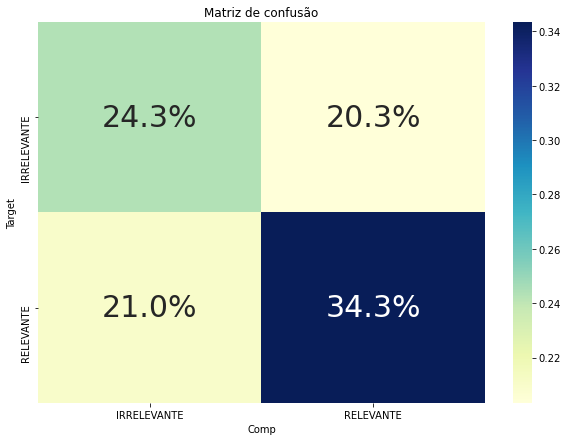

In [28]:
tabela_cruzada = pd.crosstab(performer.Target, performer.Comp, normalize=True)
plt.figure(figsize=(10,7))
plt.title('Matriz de confusão')
sn.heatmap(tabela_cruzada, annot=True, annot_kws={"size": 30}, fmt='.1%', cmap='YlGnBu')
plt.show()

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [29]:
Verifier = test.copy()

In [30]:
Verifier['CLEAN'] = Verifier['Titulo'].apply(limpatudo)
Verifier['Comp'] = Verifier.CLEAN.apply(Bayes)

Verifier.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target,CLEAN,Comp
0,Internacional,Joe Biden: 20 frases marcantes de seu 1º discu...,NaN,01/03/2022 - 22:56,25,IRRELEVANTE,joe biden 20 fras marcant 1o discurs estad unia,RELEVANTE
1,Política,Biden anuncia proibição dos EUA a importações ...,"O presidente dos Estados Unidos, Joe Biden, an...",08/03/2022 - 13:52,6,RELEVANTE,biden anunc proibica eua importaco petrol russ,RELEVANTE
2,Internacional,China critica EUA e não condena Rússia por açã...,A China se recusou a condenar o ataque da Rúss...,24/02/2022 - 12:08,40,IRRELEVANTE,chin critic eua nao conden russ aca ucran,IRRELEVANTE
3,Mercados,S&P 500 abre em forte queda após Rússia atacar...,As bolsas dos Estados Unidos abriram em forte ...,24/02/2022 - 11:37,40,RELEVANTE,s p 500 abre fort qued apos russ atac ucrania;...,RELEVANTE
4,Carteira Recomendada,Genial faz duas alterações em carteira recomen...,A Genial Investimentos fez duas alterações em ...,28/02/2022 - 15:53,27,IRRELEVANTE,genial faz duas alteraco carteir recomend par ...,IRRELEVANTE


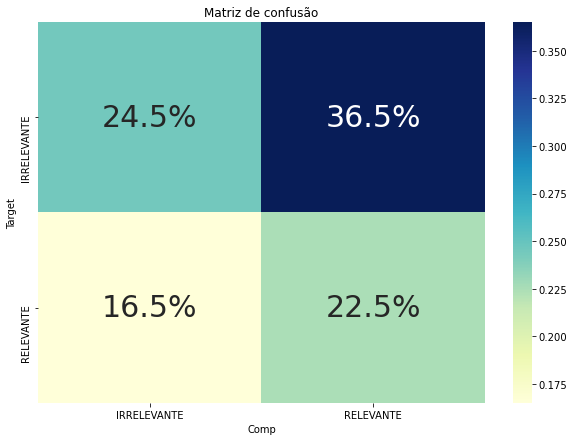

In [31]:
tabela_cruzada = pd.crosstab(Verifier.Target, Verifier.Comp, normalize=True)
plt.figure(figsize=(10,7))
plt.title('Matriz de confusão')
sn.heatmap(tabela_cruzada, annot=True, annot_kws={"size": 30}, fmt='.1%', cmap='YlGnBu')
plt.show()

In [32]:
verdadeiros_negativos = Verifier.loc[(Verifier['Comp'] == 'IRRELEVANTE') & (Verifier['Target'] == 'IRRELEVANTE'),:].shape[0]
falsos_negativos = Verifier.loc[(Verifier['Comp'] == 'IRRELEVANTE') & (Verifier['Target'] == 'RELEVANTE'),:].shape[0]

print(f'O percentual de verdadeiros negativo foi de: {100*(verdadeiros_negativos)/Verifier.shape[0]:.2f}%')
print(f'O percentual de falsos negativo foi de: {100*(falsos_negativos)/Verifier.shape[0]:.2f}%')

O percentual de verdadeiros negativo foi de: 24.50%
O percentual de falsos negativo foi de: 16.50%


In [33]:
verdadeiros_positivos = Verifier.loc[(Verifier['Comp'] == 'RELEVANTE') & (Verifier['Target'] == 'RELEVANTE'),:].shape[0]
falsos_positivos = Verifier.loc[(Verifier['Comp'] == 'RELEVANTE') & (Verifier['Target'] == 'IRRELEVANTE'),:].shape[0]

print(f'O percentual de verdadeiros positivos foi de: {100*(verdadeiros_positivos)/Verifier.shape[0]:.2f}%')
print(f'O percentual de falsos positivos foi de: {100*(falsos_positivos)/Verifier.shape[0]:.2f}%')

O percentual de verdadeiros positivos foi de: 22.50%
O percentual de falsos positivos foi de: 36.50%


In [34]:
print(f'A acurácia do modelo foi de: {100*(verdadeiros_negativos+verdadeiros_positivos)/test.shape[0]:.2f}%')

A acurácia do modelo foi de: 47.00%


___
### Concluindo

In [35]:
# Fala sobre a eficiência do Classificador e porque ele deu esses resultados, ver pelo do Valentim ou por algum dos veteranos.
# ignore códigos.

### Outras Aplicações para Naive Bayes

In [ ]:
# Censura em vídeos (pesquise um pouco)

### Sugestôes de melhorias

In [ ]:
# Se inspire em algum dos veteranos ou pergunte pro Cleilton

___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [39]:
test_split = pd.read_excel(filename, sheet_name = 'Teste').rename(columns={'Titulo':'Total'})

train_split = pd.read_excel(filename, sheet_name = 'Treinamento').rename(columns={'Titulo':'Total'})

#Concatenando
all_news = pd.concat([train_split,test_split])

#Limpando os tweets
all_news['Clean']=all_news['Total'].apply(limpatudo)
all_news.head()

,Categoria,Total,PrimeiroParag,Data,Pagina,Target,Clean
0,Mercados,Vale (VALE3): Por que as ações tiveram um dos ...,As ações da Vale (VALE3) tiveram um dos piores...,08/03/2022 - 19:35,4,RELEVANTE,val vale3 aco tiv pior desempenh ibovesp nest ...
1,Invasão da Ucrânia,Rússia invade Ucrânia: Veja as primeiras fotos...,"O presidente Vladimir Putin autorizou, na noit...",24/02/2022 - 10:10,41,IRRELEVANTE,russ invad ucran vej primeir fot vid invasa
2,Economia,Brasil é beneficiado por empresas que convivem...,"O presidente do Banco Central, Roberto Campos ...",22/02/2022 - 16:53,47,IRRELEVANTE,brasil benefic empres conviv bem inflaca diz c...
3,Resultados,Bayer supera expectativa e tem lucro líquido d...,"A Bayer obteve lucro líquido de 1,16 bilhão de...",02/03/2022 - 11:23,24,RELEVANTE,bay sup expect lucr liqu 1 16 bilha eur 4o tri
4,Colunista Vitreo,Pré-Mercado: E o petróleo vai às alturas,"O mercado sofre bastante internacionalmente, a...",07/03/2022 - 8:46,11,RELEVANTE,pre-merc petrol vai altur


In [40]:
# Biblioteca necessária para fatiamento do conjunto de dados totais
from sklearn.model_selection import train_test_split

In [45]:
# Realiza o fatiamento do conjunto total 100 vezes de maneira aleatória
lista_hist=[]

for i in range(150):
    
    #training_data, testing_data = train_test_split(full_data, test_size=0.2, random_state=random.randint(1,500))
    #Separa o novo Data_Frame em 2 novos 'Treino' e 'Teste'  na proporção 3 pra 2.
    X_train, X_test, y_train, y_test = train_test_split(all_news[['Clean','Target']], all_news.Target, test_size=0.4)
    
    #repete-se os passos iniciais para aplicação do algoritmo de Bayes
    train_rel_new = X_train[X_train['Target']=='RELEVANTE']
    train_irrel_new = X_train[X_train['Target']=="IRRELEVANTE"]
    
    palavras_rel = serie(train_rel_new['Clean'])
    palavras_irrel = serie(train_irrel_new['Clean'])
    
    # Gera duas listas com as palavras relevantes e irrelevantes e gera uma lista total
    lista_palavras_rel = list(palavras_rel)
    lista_palavras_irrel = list(palavras_irrel)
    lista_palavras = lista_palavras_rel + lista_palavras_irrel
    lista_palavras_sem_repeticao = list(set(lista_palavras))
    total = pd.Series(lista_palavras)

    # Frequencias absolutas
    freq_palavras_relevantes_abs = palavras_rel.value_counts()
    freq_palavras_irrelevantes_abs = palavras_irrel.value_counts()
    freq_palavras_total_abs = total.value_counts()

    P_R = len(lista_palavras_rel) / len(total)

    # Por complementar, temos P_Rc
    P_Rc = len(lista_palavras_irrel) / len(total)
    
    assert P_R+P_Rc==1

    #Aplicação de Bayes a partir da nova base de testes e salva os resultados de acuracia em uma lista
    X_test['Modelo'] = X_test['Clean'].apply(Bayes)

    verdadeiros_positivos = X_test.loc[(X_test['Modelo'] == 'RELEVANTE') & (X_test['Target'] == 'RELEVANTE'),:].shape[0]
    verdadeiros_negativos = X_test.loc[(X_test['Modelo'] == 'IRRELEVANTE') & (X_test['Target'] == 'IRRELEVANTE'),:].shape[0]
    acuracia = (verdadeiros_positivos + verdadeiros_negativos)/X_test.shape[0]
    lista_hist.append(acuracia * 100)

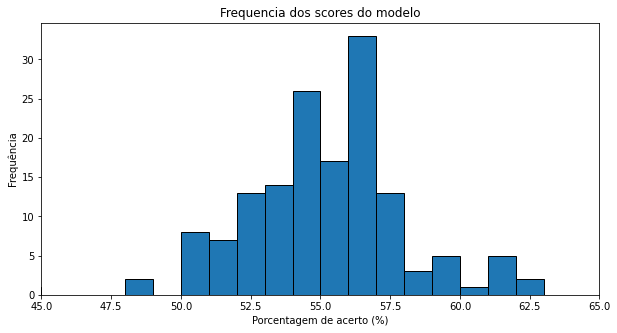

In [46]:
# Monta um histograma com a frequência de acuracia do modelo partindo das novas divisões

faixa=np.arange(30,99,1)
plt.figure(figsize=(10, 5))
plt.hist(lista_hist, bins=faixa, edgecolor='black', density=False)
plt.title('Frequencia dos scores do modelo')
plt.ylabel('Frequência')
plt.xlabel('Porcentagem de acerto (%)')
plt.xlim(45,65)
plt.show()

In [43]:
print('Score máximo: ', round(max(lista_hist), 2))
print('Score mínimo: ', round(min(lista_hist), 2))
print('Score médio: ', round(sum(lista_hist)/len(lista_hist), 2))

Score máximo:  62.5
Score mínimo:  48.5
Score médio:  55.3


In [47]:
#Breve descrição dos novos resultados

### Criação de Novas Categorias

In [48]:
def Bayes_cat(frase):
    # Calculo da diferença relativa entre as probabilidades
    relative = (prob_rel(frase) - prob_irrel(frase))/(prob_rel(frase) + prob_irrel(frase))
    return relative

In [49]:
#Criação de novo data_frame para separação das categorias
test_degree = Verifier.copy()
test_degree['Prob']=test_degree['CLEAN'].apply(Bayes_cat)
test_degree.Prob

0      0.985505
1      0.048568
2     -0.658399
3      0.999802
4     -0.934699
         ...   
195   -0.997438
196    0.976684
197    0.663939
198   -0.709183
199   -0.982667
Name: Prob, Length: 200, dtype: float64

In [114]:
#Separação das categorias
def Categoria(p):
    p = float(p)
    
    # Se a diferença relativa for baixa, considera-se neutro
    if abs(p) <= 0.2:
        return 'Neutro'
    
    elif 0.2 < p and p <=0.6:
        return 'Relevante'
    
    elif 0.6 < p:
        return 'Muito Relevante'
    
    elif -0.2 > p and p >= -0.6:
        return 'Irrelevante'
    
    else:
        return 'Muito Irrelevante'
    

In [115]:
test_degree['Relevancia'] = test_degree.Prob.apply(Categoria)
test_degree.Relevancia.value_counts()

Muito Relevante      79
Muito Irrelevante    67
Relevante            23
Neutro               18
Irrelevante          13
Name: Relevancia, dtype: int64

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas notícias. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas caterogias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por caterogia (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**